# Machine Learning Model

Importação das bibliotecas

In [56]:
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_log_error

Os pacotes importados são utilizados a seguir para a modelagem dos dados tratados no notebook de Análise (Deve ser executado primeiro). A partir das features (Rooms, Date, Distance, Car, ...) devemos prever um target (Price), portanto se tratando de um modelo de *Regressão*. Além disso, serão utilizados dois tipos de testes: R2 e MSE.

In [57]:
import warnings
warnings.filterwarnings('ignore')

Remove warnings

# Carrega Base de dados Tratada

In [58]:
base = pd.read_csv("./data/base_tratada.csv", sep=";", usecols=None)
print(base.shape)     
base.head()

(13580, 10)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,2,1480000.0,2.5,1.0,1.0,202.0,-37.7996,144.9984,4019.0,3
1,2,1035000.0,2.5,1.0,0.0,156.0,-37.8079,144.9934,4019.0,4
2,3,1465000.0,2.5,2.0,0.0,134.0,-37.8093,144.9944,4019.0,4
3,3,850000.0,2.5,2.0,1.0,94.0,-37.7969,144.9969,4019.0,4
4,4,1600000.0,2.5,1.0,2.0,120.0,-37.8072,144.9941,4019.0,4


A base carregada é a base tratada resultante da Limpeza realizada no notebook da EDA. para aplicar um modelo de regressão. iremos escolher um método de preprocessamento das features da base. 


Percebemos que cada feature conta com unidades, extremos e escalas distintas e o modelo é sensível a tais características da base. Devemos ter como comparar as features e isso significa padronizar sua distribuição. Faremos entrão o Preprocessamento ou Redimensionamento das features da base.

## PreProcessamento da Base

Apresentamos duas maneiras de realizar o redimensionamento da base:

- [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html): Redimensiona as features para a uma escala entre 0 e 1. Este tipo de distribuição é utilizada para redimensionar features onde o mínimo e o máximo exercem influência significativa na análise.


- [`Stadartization`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html): Redimensiona os valores das features para eliminar a média (zerar) e converte as dimensões para a unidade de "desvio-padrão da média". Este redimensionamento deve ser utilizado quando a distribuição de valores na feature segue uma distribuição normal ou aproximadamente normal.

### Min Max Scaler

In [59]:
# cols = [col for col in base.columns if col != "Price"]
# for col in cols:
#     # find minimum and maximum of that column
#     minimum = min(base[col])
#     maximum = max(base[col])
#     base[col] = (base[col] - minimum) / (maximum - minimum)

# print(base.shape)
# base.head()

### Standardization 

In [60]:
# standardization

scalar = preprocessing.StandardScaler(with_mean=True, with_std=True)

# fit our data
cols = [col for col in base.columns if col != "Price"]
scaled_cols = scalar.fit_transform(base[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,-0.981463,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625,-1.342079
1,-0.981463,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625,-0.979550
2,0.064876,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625,-0.979550
3,0.064876,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625,-0.979550
4,1.111216,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625,-0.979550


In [61]:
for col in cols:
    base[col] = scaled_cols[col]

print(base.shape)
base.head()

(13580, 10)


,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
0,-0.981463,1480000.0,-1.301485,-0.772376,-0.636847,-0.089316,0.121160,0.030640,-0.784625,-1.342079
1,-0.981463,1035000.0,-1.301485,-0.772376,-1.677692,-0.100843,0.016437,-0.017478,-0.784625,-0.979550
2,0.064876,1465000.0,-1.301485,0.673367,-1.677692,-0.106356,-0.001227,-0.007855,-0.784625,-0.979550
3,0.064876,850000.0,-1.301485,0.673367,-0.636847,-0.116380,0.155226,0.016204,-0.784625,-0.979550
4,1.111216,1600000.0,-1.301485,-0.772376,0.403998,-0.109864,0.025269,-0.010742,-0.784625,-0.979550


Escolhemos o redimensionamento por normalização já que vimos que as principais features tem distribuição normal ou quase normal. O redimensionamento não irá alterar o erro da regressão, no entanto afeta a qualidade já que um feature desproporcional aos demais pode ter um peso maior em comparação, daí a necessidade do dimensionamento.

## Model Training

In [62]:
## Input Split

X = base.drop(columns=['Price'])
y = base['Price']

dropamos o valor alvo e setamos a variável X como sendo as features utilizadas no modelo. y é o nosso alvo da regressão.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(f"train {x_train.shape}")
print(f"test {x_test.shape}")

train (10185, 9)
test (3395, 9)


Dividimos randomicamente o dataset em teste e treino de x e y, repectivamente, ao descompactar a tupla de retorno. O valor `random_state` significa um número de seed dado com fins de reprodutibilidade da divisão.

In [64]:
x_test.head()

,Rooms,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,Month
1061,0.064876,0.181004,0.673367,1.444843,0.007414,-1.507721,-0.030951,0.713632,-0.254491
6482,-0.981463,-1.403726,-0.772376,-0.636847,-0.139936,0.001296,-0.415893,-1.193220,-0.617021
8395,0.064876,-0.688041,-0.772376,-1.677692,-0.139936,-0.789802,-0.178191,1.321386,-0.979550
4659,0.064876,-0.040517,0.673367,-0.636847,-0.103349,1.186051,-0.583343,0.006985,-0.254491
7386,-0.981463,-0.176838,-0.772376,0.403998,-0.024161,-0.301517,-1.190589,-1.477797,0.833097


### Linear Regression

Na regressão linear, teremos as features (parametros) como valores numéricos já preprocessados no passo anterior como entrada deste modelo de regressão com intuito de prever, extrapolar ou interpolar, o alvo (preço).

O modelo é uma implementação de uma função do tipo $\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$, onde $\hat{y}$ é o valor alvo a ser previsto, n é o número de features, x é o valor da feature, $\theta_j$ é o j-ésimo valor do peso do modelo. Considerando os valores das features e dos pesos como inputs de vetores coluna, teremos $\hat{y} = h_{\theta}(\bold{x}) = \bold{\theta^{T}}\bold{x}$, na forma vetorizada. O h pode ser chamado de função hipótese, que vai ser minimizada contra as features de treino ao quadrado, Erro Quadrático Médio.

$$ MSE(\bold{X}, h_\theta) = \frac{1}{N} \sum_{i=1}^N \big(\bold{\theta^{T}}\bold{x}^{(i)}-y^{(i)}\big)^2 $$


O valor do vetor $\theta$ que minimiza a função custo tem uma solução fechada dada pela equação normal:

$$ \hat{\bold{\theta}} = (\bold{X}^T\bold{X})^{-1}\bold{X}^T \bold{y} $$

### $R^2$ - Coeficiente de Determinação

Um dos coeficientes de erro utilizados para determianar a qualidade da regressão é o "R quadrado" que mede a proporção da variação da variavel dependente que é prevista pelas variáveis independentes. Sua equação é como se segue:

$$ R^2 = 1 - \frac{\displaystyle \sum_{i=0}^N \big(y^{(i)} - h(\theta)^{(i)}\big)}{\displaystyle \sum_{i=0}^N \big(y^{(i)} - \bar{y}\big)} $$

onde $\bar{y}$ é a média dos valores de y. O coeficiente varia de 0 a 1, onde 1 representa a predição perfeita do alvo pelas features.

R2 0.4805994196314072


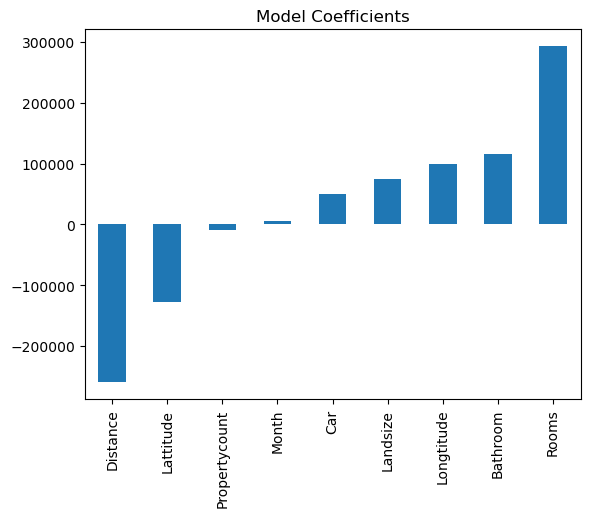

In [65]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression(normalize=True)
model_lr.fit(x_train, y_train)

pred_lr = model_lr.predict(x_test)
#mean_sqr_lr = mean_squared_error(y_test, pred_lr)
r2_lr = r2_score(y_test, pred_lr)
print("R2", r2_lr)
#print("MSE", mean_sqr_lr)

coef_lr = pd.Series(model_lr.coef_, X.columns).sort_values()
coef_lr.plot(kind='bar', title="Model Coefficients")
plt.show()

In [66]:
# result = [i/(1e6) for i in pred_lr]
# result

In [67]:
# x_tst = x_test
# x_tst["Predicted_Value"] = result
# x_tst

 Visualiza os valores previstos x y_test

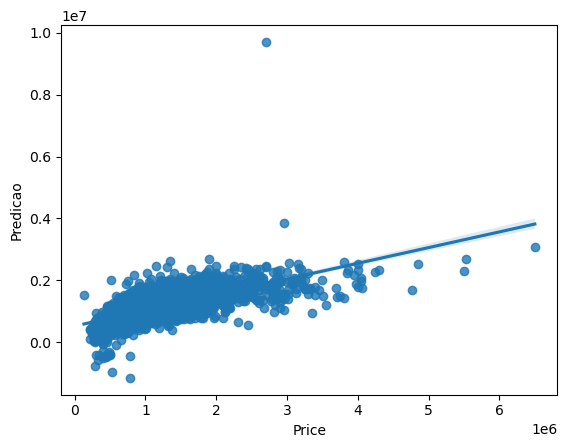

In [71]:
# concatena os dois objetos no axis columns
df_pred_lr = pd.concat([y_test.reset_index(drop=True), # reseta o index e dropa a coluna do old index
            pd.Series(pred_lr, name="Predicao")],      
            axis=1)                                    

sns.regplot(x="Price", y="Predicao", data=df_pred_lr)
plt.show()

### Random Forest Regressor

As arvores de decisão são obejtos utilzados em modelos que envolvem a classificação de features, organizando-as em uma estruta de árvore, com cada ponto do nó sendo decidido pela classificação do valor, caracterizando e identificando assim de uma forma unívoca as features. Porém, podemos utilizar valores numéricos, e não labels, para determinar numéricamente, transformado ele efetivamente em um regressor. 

A Random Forest ("Floresta Aleatória") é um algoritmo de aprendizado de máquina utilizado para tarefas de classificação e regressão. É composto por várias árvores de decisão individuais, onde cada árvore é treinada em uma amostra aleatória do conjunto de dados. Durante a previsão, as respostas de cada árvore são combinadas para obter uma predição final mais precisa e estável.

A random forest é um metaestimador que ajusta um número de árvores de decisão classificadoras em várias subamostras do conjunto de dados e usa a média para melhorar a precisão preditiva e controlar o overfitting.

R2 0.7939906761255252


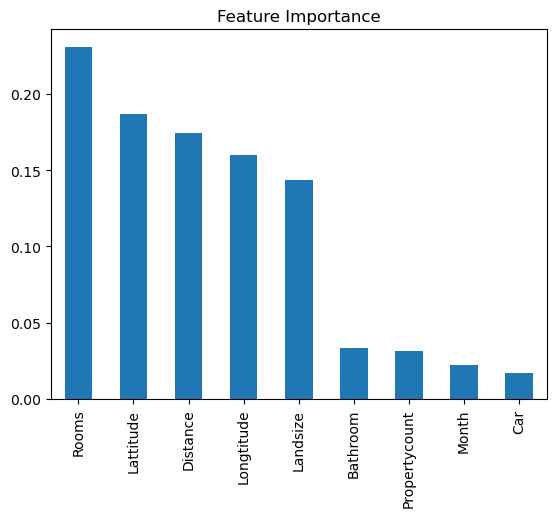

In [82]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
model_rfr.fit(x_train, y_train)

pred_rfr = model_rfr.predict(x_test)
# mean_sqr_rfr = mean_squared_error(y_test, pred_rfr)
r2_rfr = r2_score(y_test, pred_rfr)
print("R2", r2_rfr)

coef_rfr = pd.Series(model_rfr.feature_importances_, X.columns).sort_values(ascending=False)
coef_rfr.plot(kind='bar', title="Feature Importance")
plt.show()

repetimos o passo de visualização do modelo anterior

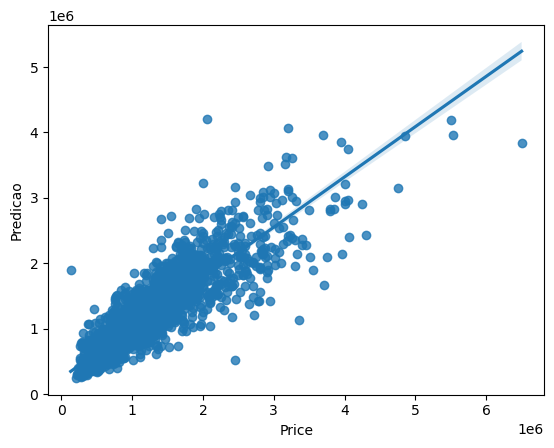

In [78]:
df_pred_rfr = pd.concat([y_test.reset_index(drop=True), 
            pd.Series(pred_rfr, name="Predicao")], 
            axis=1)

sns.regplot(x="Price", y="Predicao", data=df_pred_rfr)
plt.show()